<a id="Objective"></a>
<h1>Objective:</h1></br>

The Objective of this exercise is to build a classification model to help identify creditworthy customers from historical data of defaulters and non-defaulters provided (under file_2.csv)

<a id="introduction"></a>

### Abstract

<p> In this work we will attempt to train a <strong>Logistic Regression classifier (Supervised ML model)</strong> on customers dataset. As a checker in a separate notebook we will later try to use a powerful Unsupervised ML model (Random Forest) to get comfort of the performance of our logistic regression classifier before we are able to make conclusion.</p>
<br>
<strong> Logistic regression </strong>- Is a supervised Machine Learning algorithm that can be used for both Classification and Regression tasks. In most cases we deal with two-classes problems <strong>(binomial classification)</strong> Softmax regression can be used for multinomial classification problems. Softmax Regression is sometimes refered to as a Multinomial Logistic Regression.

The logistic regression function 𝑝(𝐱) is the sigmoid function of 𝑓(𝐱): 𝑝(𝐱) = 1 / (1 + exp(−𝑓(𝐱))
To get the best weights, you usually maximize the log-likelihood function (LLF) for all observations 𝑖 = 1, …, 𝑛. This method is called the maximum likelihood estimation and is represented by the equation LLF = Σᵢ(𝑦ᵢ log(𝑝(𝐱ᵢ)) + (1 − 𝑦ᵢ) log(1 − 𝑝(𝐱ᵢ)))

<strong> Random Forest </strong>- a Random Forest is an ensemble of Decision Trees, generally trained via the bagging method (or sometimes pasting), typically with max_samples set to the size of the training set. Random forest uses bagging (picking a sample of observations rather than all of them) and random subspace method (picking a sample of features rather than all of them, in other words - attribute bagging) to grow a tree.

In [1]:
#listing important packages needed 

required.packages <- c("tidyverse", "pROC", "stringr", "ggcorrplot", "caret")

In [2]:
#verify if all above packages are contained in the list of installed packages for our R environment
missing.packages <- required.packages[!(required.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)>0) install.packages(missing.packages, dependencies = TRUE)

#loading packages
sapply(required.packages, require, character.only = TRUE)

Loading required package: tidyverse

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.8
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Loading required package: pROC

Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var


Loading required package: ggcorrplot

Loading required package: caret

Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift




tidyverse       pROC    stringr ggcorrplot      caret 
      TRUE       TRUE       TRUE       TRUE       TRUE

<a id="prep_data"></a>

### 1. Preparing Data

In [3]:
data <- read.csv('file_2.csv')

In [4]:
head(data,3)

ï..tenure.month loan.fee loan  mobile.transactions mobile.transactions.value
1  5               4.7     10680  0                        0                  
2 21               9.6      9120 13                  2922000                  
3 28              10.9     57900  0                        0                  
  mobile.services app.users TOTAL_INFLOW SALARY_STATUS TOTAL_OUTFLOW age gender
1 0               0               0      0                   0       25  M     
2 3               0         3000000      0             2994764       36  M     
3 0               0               0      0              502900       25  M     
  is_default
1 Y         
2 N         
3 Y

### 2. Tidying Up data
Cleaning column names and ensuring data has the correct data type. Data type can really affect model's performance

In [5]:
# Upper case column names
names(data) <- toupper(names(data))

In [6]:
names(data)[names(data)=='Ï..TENURE.MONTH'] <- c('TENURE.MONTH')

In [7]:
head(data,3)

TENURE.MONTH LOAN.FEE LOAN  MOBILE.TRANSACTIONS MOBILE.TRANSACTIONS.VALUE
1  5            4.7     10680  0                        0                  
2 21            9.6      9120 13                  2922000                  
3 28           10.9     57900  0                        0                  
  MOBILE.SERVICES APP.USERS TOTAL_INFLOW SALARY_STATUS TOTAL_OUTFLOW AGE GENDER
1 0               0               0      0                   0       25  M     
2 3               0         3000000      0             2994764       36  M     
3 0               0               0      0              502900       25  M     
  IS_DEFAULT
1 Y         
2 N         
3 Y

In [8]:
# Replace dots with underscores
names(data) <- gsub('\\.', '_', names(data))

In [9]:
# Check distribution of the outcome variable
table(data$IS_DEFAULT)


   N    Y 
5391 5619 

In [10]:
# Preview data
head(data,3)

TENURE_MONTH LOAN_FEE LOAN  MOBILE_TRANSACTIONS MOBILE_TRANSACTIONS_VALUE
1  5            4.7     10680  0                        0                  
2 21            9.6      9120 13                  2922000                  
3 28           10.9     57900  0                        0                  
  MOBILE_SERVICES APP_USERS TOTAL_INFLOW SALARY_STATUS TOTAL_OUTFLOW AGE GENDER
1 0               0               0      0                   0       25  M     
2 3               0         3000000      0             2994764       36  M     
3 0               0               0      0              502900       25  M     
  IS_DEFAULT
1 Y         
2 N         
3 Y

In [11]:
# checking features stored types
str(data)

'data.frame':	11010 obs. of  13 variables:
 $ TENURE_MONTH             : int  5 21 28 2 21 28 14 14 21 14 ...
 $ LOAN_FEE                 : num  4.7 9.6 10.9 4.7 9.6 10.9 7.8 7.8 9.6 7.8 ...
 $ LOAN                     : num  10680 9120 57900 1090 71250 ...
 $ MOBILE_TRANSACTIONS      : int  0 13 0 0 34 0 4 113 25 12 ...
 $ MOBILE_TRANSACTIONS_VALUE: num  0 2922000 0 0 502000 ...
 $ MOBILE_SERVICES          : int  0 3 0 0 6 0 1 9 2 4 ...
 $ APP_USERS                : int  0 0 0 0 0 0 0 0 0 0 ...
 $ TOTAL_INFLOW             : int  0 3000000 0 281400 1548399 353597 836622 14250000 1921850 24384 ...
 $ SALARY_STATUS            : int  0 0 0 1 1 1 0 0 1 0 ...
 $ TOTAL_OUTFLOW            : int  0 2994764 502900 148931 1265621 351355 662400 16374108 1675230 189341 ...
 $ AGE                      : int  25 36 25 32 32 35 25 33 46 23 ...
 $ GENDER                   : chr  "M" "M" "M" "F" ...
 $ IS_DEFAULT               : chr  "Y" "N" "Y" "Y" ...


In [12]:
# Casting columns to numeric
data$TOTAL_INFLOW <- as.numeric(data$TOTAL_INFLOW)
data$TOTAL_OUTFLOW <- as.numeric(data$TOTAL_OUTFLOW)

### 3. Exploratory Data Analysis

In [13]:
nrow(data)

[1] 11010

In [14]:
ncol(data)

[1] 13

The dataset has 11,010 records and 13 features/columns that we will need to use for this exercise. <br> 
<strong>IS_DEFAULT</strong>: Is the outcome variable flagging whether customers had defaulted or not <br>
The remaining 12 features are to be used to make predictions (independent variables)

In [15]:
summary(data)

  TENURE_MONTH      LOAN_FEE           LOAN          MOBILE_TRANSACTIONS
 Min.   : 0.00   Min.   : 2.100   Min.   :     4.4   Min.   :  0.00     
 1st Qu.: 5.00   1st Qu.: 4.700   1st Qu.: 11140.0   1st Qu.:  3.00     
 Median :21.00   Median : 9.600   Median : 22800.0   Median :  8.00     
 Mean   :15.73   Mean   : 8.025   Mean   : 37849.7   Mean   : 14.41     
 3rd Qu.:21.00   3rd Qu.: 9.600   3rd Qu.: 57900.0   3rd Qu.: 17.00     
 Max.   :28.00   Max.   :10.900   Max.   :478950.0   Max.   :304.00     
 MOBILE_TRANSACTIONS_VALUE MOBILE_SERVICES    APP_USERS     
 Min.   :       0          Min.   : 0.000   Min.   :0.0000  
 1st Qu.:    3000          1st Qu.: 1.000   1st Qu.:0.0000  
 Median :   50000          Median : 3.000   Median :0.0000  
 Mean   :  581946          Mean   : 2.803   Mean   :0.1734  
 3rd Qu.:  341000          3rd Qu.: 4.000   3rd Qu.:0.0000  
 Max.   :50864000          Max.   :12.000   Max.   :1.0000  
  TOTAL_INFLOW       SALARY_STATUS    TOTAL_OUTFLOW           

### 4. Some Feature Engineering

For Logistic regression to learn best we need to control feature variance. For some features we are going to group together values that are closely related together ie. they have minimal variance when sitting together than when in any other different group.

We are going to use Jenkspy - a univariate clustering algorithm to help us get the breakpoints. Jenkspy notebook is located in folder called "more notebooks"

In [16]:
# Variance control: Closely related values are grouped together and encoded (1,2,3)

var_grps <- function(x){
    breaks <- function (y,z){
        x <- ifelse(x<=y, 1L, ifelse(x<=z, 2L,3L))
    }
}

In [17]:
# Encoding features based on breakpoints ie. boundary values separating groups 
# Breakpoints are obtained with assistance of Jenkspy
data <- mutate(data, TENURE_MONTH=ifelse(TENURE_MONTH<=7, 1L, ifelse(TENURE_MONTH<=21, 2L,3L)))
data <- mutate(data, LOAN_FEE=ifelse(LOAN_FEE<=4.7, 1L, ifelse(LOAN_FEE<=8.5, 2L,3L)))
data <- mutate(data, LOAN=ifelse(LOAN<=41836.08, 1L, ifelse(LOAN<=114000, 2L,3L)))
data <- mutate(data, MOBILE_TRANSACTIONS=ifelse(MOBILE_TRANSACTIONS<=21, 1L, ifelse(MOBILE_TRANSACTIONS<=69, 2L,3L)))
data <- mutate(data, MOBILE_TRANSACTIONS_VALUE=ifelse(MOBILE_TRANSACTIONS_VALUE<=4706000, 1L, ifelse(MOBILE_TRANSACTIONS_VALUE<=25699000, 2L,3L)))
data <- mutate(data, MOBILE_SERVICES=ifelse(MOBILE_SERVICES<=2, 1L, ifelse(MOBILE_SERVICES<=4, 2L,3L)))
data <- mutate(data, TOTAL_INFLOW=ifelse(TOTAL_INFLOW<=15955375, 1L, ifelse(TOTAL_INFLOW<=71537958, 2L,3L)))
data <- mutate(data, TOTAL_OUTFLOW=ifelse(TOTAL_OUTFLOW<=17292151, 1L, ifelse(TOTAL_OUTFLOW<=74902255, 2L,3L)))
data <- mutate(data, AGE=ifelse(AGE<=30, 1L, ifelse(AGE<=41, 2L,3L)))

#### Encoding some more features

In [18]:
# Feature encoding (encoding to either 0 or 1 as integer - boolean would also be fine)

encoder <- function(x){
    if (x %in% c("M","Y")){
        x <- 1L
    } else {
        x <- 0L
    }
}

In [19]:
# Encoding GENDER and IS_DEFAULT

data$GENDER <- sapply(data$GENDER, encoder)
data$IS_DEFAULT <- sapply(data$IS_DEFAULT, encoder)

In [20]:
head(data,5)

TENURE_MONTH LOAN_FEE LOAN MOBILE_TRANSACTIONS MOBILE_TRANSACTIONS_VALUE
1 1            1        1    1                   1                        
2 2            3        1    1                   1                        
3 3            3        2    1                   1                        
4 1            1        1    1                   1                        
5 2            3        2    2                   1                        
  MOBILE_SERVICES APP_USERS TOTAL_INFLOW SALARY_STATUS TOTAL_OUTFLOW AGE GENDER
1 1               0         1            0             1             1   1     
2 2               0         1            0             1             2   1     
3 1               0         1            0             1             1   1     
4 1               0         1            1             1             2   0     
5 3               0         1            1             1             2   0     
  IS_DEFAULT
1 1         
2 0         
3 1         
4 1         
5 0

In [21]:
str(data)

'data.frame':	11010 obs. of  13 variables:
 $ TENURE_MONTH             : int  1 2 3 1 2 3 2 2 2 2 ...
 $ LOAN_FEE                 : int  1 3 3 1 3 3 2 2 3 2 ...
 $ LOAN                     : int  1 1 2 1 2 1 1 2 2 2 ...
 $ MOBILE_TRANSACTIONS      : int  1 1 1 1 2 1 1 3 2 1 ...
 $ MOBILE_TRANSACTIONS_VALUE: int  1 1 1 1 1 1 1 2 1 1 ...
 $ MOBILE_SERVICES          : int  1 2 1 1 3 1 1 3 1 2 ...
 $ APP_USERS                : int  0 0 0 0 0 0 0 0 0 0 ...
 $ TOTAL_INFLOW             : int  1 1 1 1 1 1 1 1 1 1 ...
 $ SALARY_STATUS            : int  0 0 0 1 1 1 0 0 1 0 ...
 $ TOTAL_OUTFLOW            : int  1 1 1 1 1 1 1 1 1 1 ...
 $ AGE                      : int  1 2 1 2 2 2 1 2 3 1 ...
 $ GENDER                   : int  1 1 1 0 0 1 1 1 1 1 ...
 $ IS_DEFAULT               : int  1 0 1 1 0 0 1 0 0 1 ...


In [22]:
# Check for NAs

sum(is.na(data)) # there are no nas

[1] 0

In [23]:
# Data is now clean let's check some EDA quickly

summary(data)

  TENURE_MONTH      LOAN_FEE          LOAN       MOBILE_TRANSACTIONS
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000      
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.000      
 Median :2.000   Median :3.000   Median :1.000   Median :1.000      
 Mean   :1.895   Mean   :2.256   Mean   :1.399   Mean   :1.226      
 3rd Qu.:2.000   3rd Qu.:3.000   3rd Qu.:2.000   3rd Qu.:1.000      
 Max.   :3.000   Max.   :3.000   Max.   :3.000   Max.   :3.000      
 MOBILE_TRANSACTIONS_VALUE MOBILE_SERVICES   APP_USERS       TOTAL_INFLOW  
 Min.   :1.000             Min.   :1.000   Min.   :0.0000   Min.   :1.000  
 1st Qu.:1.000             1st Qu.:1.000   1st Qu.:0.0000   1st Qu.:1.000  
 Median :1.000             Median :2.000   Median :0.0000   Median :1.000  
 Mean   :1.027             Mean   :1.681   Mean   :0.1734   Mean   :1.024  
 3rd Qu.:1.000             3rd Qu.:2.000   3rd Qu.:0.0000   3rd Qu.:1.000  
 Max.   :3.000             Max.   :3.000   Max.   :1.0000   M

In [24]:
# Number of records 
nrow(data)

[1] 11010

In [25]:
# Number of features in the records
ncol(data)

[1] 13

In [26]:
# Reconfirming the outcome variable. The split is good.
table(data$IS_DEFAULT)


   0    1 
5391 5619 

### 5. Feature Correlation 

From the correlation plot <strong> (using Pearson correlation coefficient) </strong> below we can see there exists a relatively weak correlation between any individual independent variable to the outcome variable. <br>

Age, Mobile Transactions Value are relatively highly correlated to outcome but again, correlation seems weak. <br>

For that case for the model to be able to learn well we might need more data records or more features. When one feature is not discriminative enough, a combination of features can add value to training.

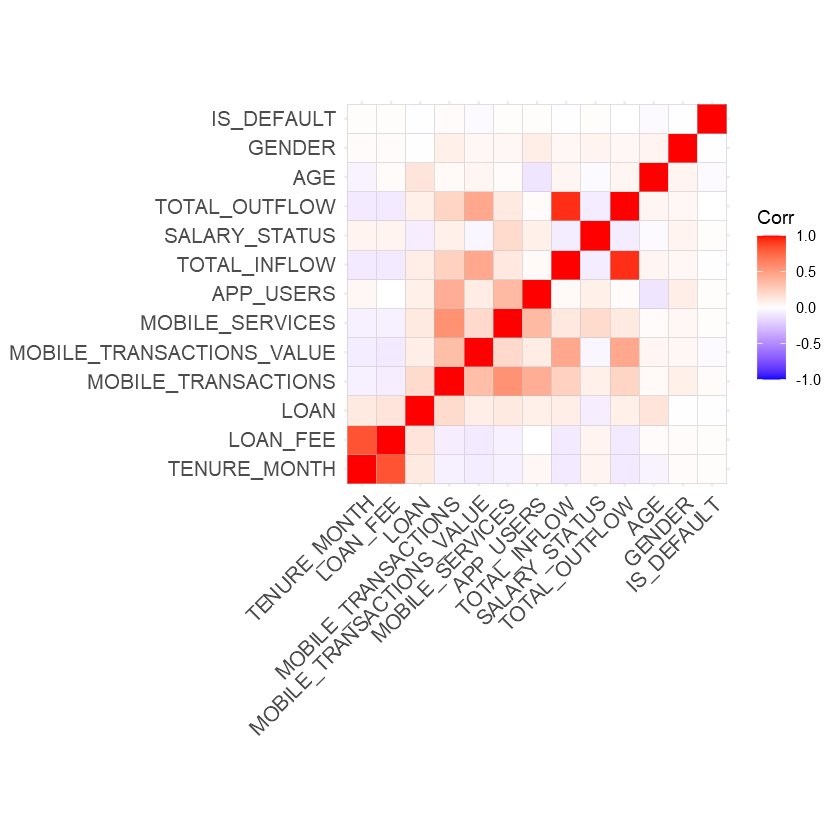

In [27]:
# Checking Correlation between variables

ggcorrplot::ggcorrplot(cor(data))

## 6. Preparing Train and Test Data

In [28]:
# Preparing the outcome variable

data$IS_DEFAULT <- as.factor(data$IS_DEFAULT)

We split train and test data 80/20. The split is going to use statified random sampling where in train and test set distribution of the outcome variable is maintained.

In [29]:
set.seed(300)
trainIndex <- createDataPartition(data$IS_DEFAULT, p = 0.8, list = FALSE, times = 1)

In [30]:
train <- data[trainIndex,]
test <- data[-trainIndex,]

In [31]:
# Verifying distribution of Outcome variable in Train
prop.table(table(train$IS_DEFAULT))


        0         1 
0.4896129 0.5103871 

In [32]:
# Verifying distribution of Outcome variable in Test
prop.table(table(test$IS_DEFAULT))


        0         1 
0.4897774 0.5102226 

### 7. Fitting out Model

In [33]:
model <- glm( IS_DEFAULT ~., data = train, family = binomial)

In [34]:
summary(model)


Call:
glm(formula = IS_DEFAULT ~ ., family = binomial, data = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.521  -1.192   1.077   1.161   1.623  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)   
(Intercept)                0.24264    0.18657   1.301  0.19342   
TENURE_MONTH               0.06310    0.05088   1.240  0.21493   
LOAN_FEE                  -0.04295    0.04517  -0.951  0.34173   
LOAN                      -0.00807    0.03993  -0.202  0.83985   
MOBILE_TRANSACTIONS        0.15658    0.06071   2.579  0.00991 **
MOBILE_TRANSACTIONS_VALUE -0.25588    0.14973  -1.709  0.08747 . 
MOBILE_SERVICES           -0.03359    0.03531  -0.951  0.34143   
APP_USERS                 -0.02260    0.06450  -0.350  0.72607   
TOTAL_INFLOW              -0.71692    0.39236  -1.827  0.06767 . 
SALARY_STATUS              0.03793    0.04620   0.821  0.41165   
TOTAL_OUTFLOW              0.74463    0.40074   1.858  0.06315 . 
AGE                

In [35]:
# Make predictions
probabilities <- model %>% predict(test, type = "response")
predicted.classes <- ifelse(probabilities > 0.5, 1, 0)

### Model's accuracy

In [36]:
# Model accuracy
mean(predicted.classes == test$IS_DEFAULT)

[1] 0.5211268

From above we can see that our model accuracy in making predictions when decision boundary is 0.5 is <strong>52.1%</strong>. To give a picture of accuracy for all possible decision boundaries between 0 and 1 an ROC curve is used and then Area Under Curve will be a better metric to tell of a model's performance.

#### ROC Curve

Area Under Curve for our model is <strong>52.4%</strong>

In [37]:
#define object to plot and calculate AUC
rocobj <- roc(test$IS_DEFAULT, probabilities)
auc <- round(auc(test$IS_DEFAULT, probabilities),4)

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



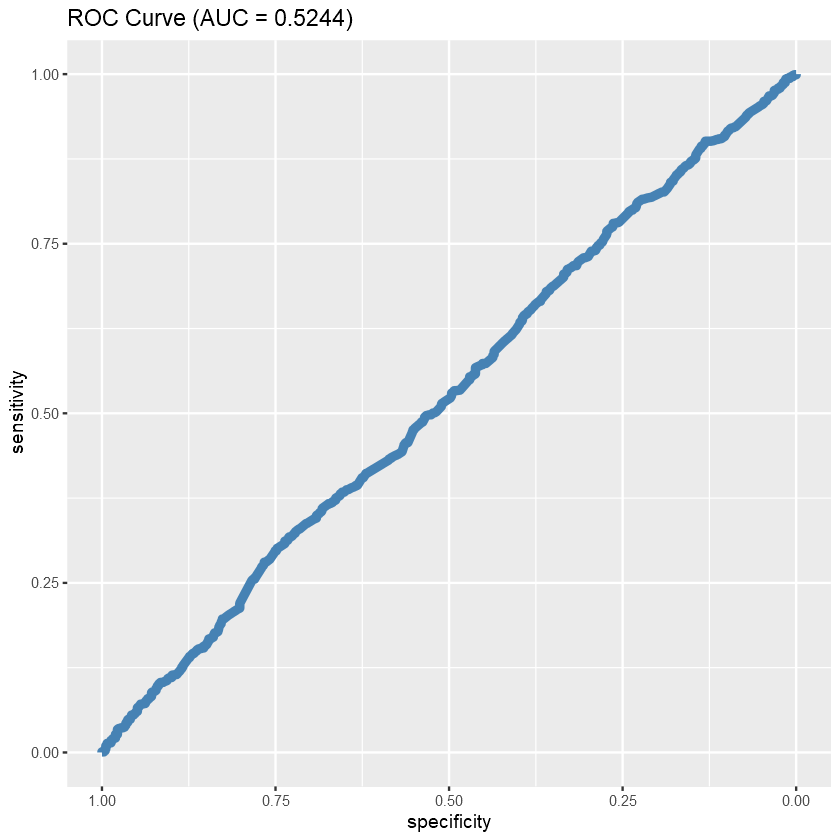

In [38]:
#create ROC plot
ggroc(rocobj, colour = 'steelblue', size = 2) +
  ggtitle(paste0('ROC Curve ', '(AUC = ', auc, ')'))

<strong>Conclusion:</strong> We have been able to train a Logistic Regression model on our dataset and the <strong>model is accurate by 52.1%</strong> with AUC of 52.4% on ROC Curve. 

To benchmark on this model's performance we train the same dataset on a <strong>Random Forest Model with 600 trees</strong> (a very powerful unsupervised ML model) which achieved an accuracy of <strong>51.5%</strong>